## Optimum Directivity Calculator
### M.T. Ma, 'Theory and Application of Antenna Arrays', Wiley-Interscience 1974

## Chapter 3: Analysis and Synthesis of Two-Dimensional Arrays (p187)

Note that for 2D arrays, $\theta$ and $\phi$ correspond to co-elevation (elevation angle $\psi = 90-\theta$) and azimuth, with zero degrees on the x-axis.

<img src="https://goo.gl/Gfm3vv" alt="Figure 1.2, Book" style="width: 600px;"/>

Total field from the entire array of equally-spaced elements is given by

## $$E(\theta,\phi)=f(\theta,\phi)\sum_{m=-N_x}^{m=+N_x}\sum_{n=-N_y}^{n=+N_y}I_{mn}e^{j(mkd_x\sin{\theta}\cos{\phi}+\alpha_x+nkd_y\sin{\theta}\sin{\phi}+\alpha_y)}\hspace{1cm}(3.3)$$

This specific form is a continuous function of the parameters, and shouldn't depend on the periodic spacing in $x$ and $y$. I think Ma has chosen this form or later analytical convenience. This single sum over all the elements should be equivalent with a single element phase $\alpha_i = \alpha_{ix} + \alpha_{iy}$:

## $$E(\phi,\theta) = f(\phi,\theta)\sum_{i=0}^N I_i e^{j\alpha_i}e^{j(kx_i\sin{\theta}\cos{\phi}+ky_i\sin{\theta}\sin{\phi})}$$

### <strong style="color:red">Check the above for cross terms!</strong>

For later reference I think this is

### $$E(\phi,\theta)=f(\phi,\theta)\sum_{i=0}^N I_i e^{j\alpha_i}e^{j\vec{k}\cdot\vec{x}}$$


$D$ is expressed in a quadratic matrix form by defining 

### \begin{equation*}
[I]=  \begin{bmatrix}
I_1 e^{j\alpha_1} \\
I_2 e^{j\alpha 2} \\
\vdots \\
I_n e^{j\alpha_n} \\
\end{bmatrix}
\hspace{3cm}
(2.233)
\end{equation*}

and following $(2.234)$:

### \begin{equation*}
[e] = \begin{bmatrix}
exp(j(kx_1\sin(\theta_0)\cos(\phi_0)+ky_1\sin(\theta_0)\sin(\phi_0)))\\
exp(j(kx_2\sin(\theta_0)\cos(\phi_0)+ky_2\sin(\theta_0)\sin(\phi_0)))\\
\vdots \\
exp(j(kx_N\sin(\theta_0)\cos(\phi_0)+ky_N\sin(\theta_0)\sin(\phi_0)))\\
\end{bmatrix}
\end{equation*}

### $$[A] = f(\theta_0,\phi_0)^2[e][e]^\dagger$$

The dipole pattern is now simply:

### $$f_{dip}(\phi,\theta) = sin(\theta)$$

The optimal excitation currents are given by

### $$I_{opt}=[B]^{-1}[e]$$

and the maximum directivity by

### $$D_{max} = [I_{opt}]^\dagger[B][I_{opt}]$$

Using the matrix $[B]$ with elements $b_{lm}$:

### $$b_{lm} = \frac{1}{4\pi} \int_0^{2\pi}\int_0^\pi f(\phi,\theta)^2 \exp{[j(k(x_l-x_m)\sin(\theta)\cos(\phi)+k(y_l-y_m)\sin(\theta)\sin(\phi))]} \sin{\theta}d\theta d\phi$$

In [174]:
import sympy as sp
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
import cycler 
%matplotlib inline
from scipy.constants import speed_of_light,foot
from IPython.display import display
from IPython.display import clear_output

from pprint import pprint
import sys
plot_colors = ['#000000','#0072bd','#d95319','#edb120','#7e2f8e',
               '#77ac30','#4dbeee','#a2142f','#adbc01','#2302cd',
               '#ff4d3b','#836dff','#c16f66','#7dd1b1','#e5e840',
               '#2f637c','#6d1e1e','#6d777c','#4b5e21','#39215e',
               '#917151','#91517a','#516591']
color_cycle = cycler.cycler('color',plot_colors)
plt.rcParams.update({'figure.figsize':[15.0,9.0],'font.size':16,
                     'lines.linewidth':2,'axes.prop_cycle':color_cycle,
                     'lines.markersize':10.0})

PRINT_EVERY_OUTPUT = False
ALREADY_CALCULATED_B = False
ALREADY_INVERTED_B = False


In [230]:
#define the element coordinates
ALREADY_CALCULATED_B = False
ALREADY_INVERTED_B = False
arraytype='circ_doub' 
if arraytype.count('circ')>0:
    Nel = 9
    eltheta = np.linspace(0,2*np.pi-2*np.pi/Nel,Nel)
    elR = 150.0*foot
    elx = elR*np.cos(eltheta)
    ely = elR*np.sin(eltheta)
    elcoords = [coordpair for coordpair in zip(elx,ely)] 
if arraytype.count('doub')>0:
    Nel = 3
    eltheta = np.linspace(0,2*np.pi-2*np.pi/Nel,Nel)+2*np.pi/(4*Nel)
    elR = 45*foot
    elx = elR*np.cos(eltheta)
    ely = elR*np.sin(eltheta)
    elcoords2 = [coordpair for coordpair in zip(elx,ely)]  
    elcoords.extend(elcoords2)
if arraytype.count('center')>0:
    elcoords.append((0.,0.))
if arraytype=='grid':
    elgrid = np.arange(-250*foot,300*foot,500*foot/4)
    elcoords = []
    elrnd = []
    for x in elgrid:
        for y in elgrid:
            elcoords.append((x,y))
print 'Element z coordinates (x,y) m: ({0})'.format(elcoords)

Element z coordinates (x,y) m: ([(45.719999999999992, 0.0), (35.023551939399667, 29.388249514868569), (7.9391946829320572, 45.025410467718146), (-22.859999999999985, 39.594681461024528), (-42.962746622331721, 15.637160952849579), (-42.962746622331728, -15.637160952849568), (-22.860000000000017, -39.594681461024514), (7.9391946829320368, -45.025410467718146), (35.02355193939966, -29.388249514868583), (11.87840443830736, 6.8579999999999979), (-11.87840443830736, 6.8579999999999979), (9.6626668800411512e-15, -13.715999999999998)])


In [258]:
freqMHz = 1.840
#optimal direction is specified by theta0 and phi0. 
theta0 = 90.0-17.0
phi0 = 180.0
wavelength = speed_of_light/(freqMHz*1.0e6)
k = 2*np.pi/wavelength
print 'Calculation frequency: {0:.3f}MHz, wavelength: {1:.3f} meters, k: {2:.4f} radians/m'.format(freqMHz,wavelength,k)

Calculation frequency: 1.840MHz, wavelength: 162.931 meters, k: 0.0386 radians/m


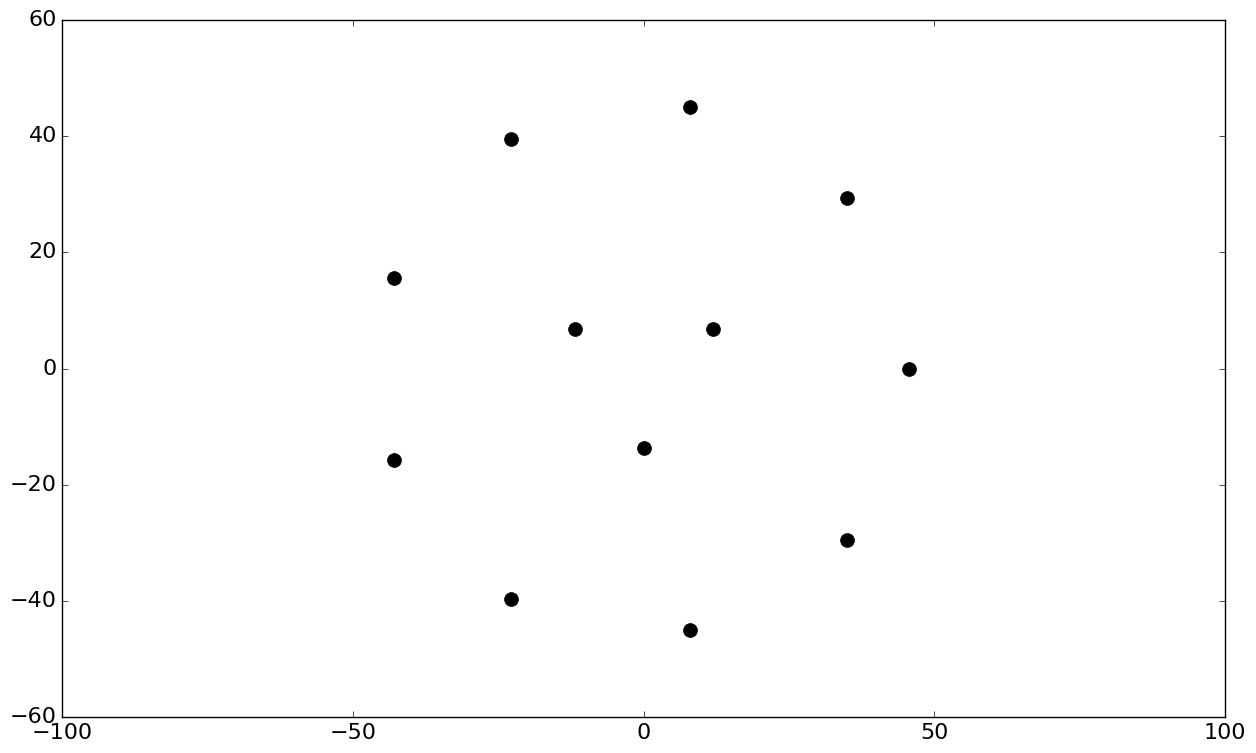

In [259]:
figp = plt.figure()
ax=figp.add_subplot(111)
for (x,y) in elcoords:
    ax.plot(x,y,marker='o',color='k')
ax.axis('equal')

In [260]:
def f_isotropic(th,phi):
    return 1.0
def f_dipole(ph,th):
    return np.sin(th)


In [261]:
def blmnum_integrand(th,phi,xl,xm,yl,ym):
    return (1/(4*np.pi)*np.power(f_dipole(phi,th),2)
            *np.exp(1j*(k*(xl-xm)*np.sin(th)*np.cos(phi)+k*(yl-ym)*np.sin(th)*np.sin(phi))))
def blmnum(xl,xm,yl,ym):
    rlprt = scipy.integrate.nquad(lambda th,ph: np.real(blmnum_integrand(th,ph,xl,xm,yl,ym)),[(0,np.pi),(0,2*np.pi)])
    imprt = scipy.integrate.nquad(lambda th,ph: np.imag(blmnum_integrand(th,ph,xl,xm,yl,ym)),[(0,np.pi),(0,2*np.pi)])
    return rlprt[0]+1j*imprt[0]

The matrix elements in [B] appear to be a function of the element positions only, so the same B matrix can be used for many $I_{opt}$ calulations!

In [262]:
if not ALREADY_CALCULATED_B:
    B = np.zeros([len(elcoords),len(elcoords)],dtype=np.complex_)
    for l,(xl,yl) in enumerate(elcoords):
        for m,(xm,ym) in enumerate(elcoords):
            clear_output()
            print '\rWorking on [B({0},{3})], element at ({1:.2f},y={2:.2f}) integrated against element at ({4:.2f},{5:.2f})'.format(
                l,xl,yl,m,xm,ym)
            sys.stdout.flush()
            B[l,m] = blmnum(xl,xm,yl,ym)
    print 'Finished!'
    ALREADY_CALCULATED_B=True


In [263]:
sp.init_printing()

In [264]:
if PRINT_EVERY_OUTPUT:
    display(sp.Matrix(B.round(3)))

In [265]:
if not ALREADY_INVERTED_B:
    Binv = np.linalg.inv(B)
    ALREADY_INVERTED_B = True
if PRINT_EVERY_OUTPUT:
    display(sp.Matrix(Binv.round(3)))

In [266]:
e = np.zeros(len(elcoords),dtype=np.complex_)
th0r = theta0*np.pi/180.0
ph0r = phi0*np.pi/180.0
for n,(x,y) in enumerate(elcoords):
    e[n] = np.exp(1j*(k*x*np.sin(th0r)*np.cos(ph0r)+k*y*np.sin(th0r)*np.sin(ph0r)))
if PRINT_EVERY_OUTPUT:
    print 'Matrix [e] is {0}, of type {1}'.format(e,type(e))

In [267]:
Iopt = np.matmul(Binv,e)
if PRINT_EVERY_OUTPUT:
    print('I_opt = ')
    display(sp.Matrix(Iopt))

In [268]:
for i,current in enumerate(Iopt): 
    print 'I{0}: {1:.3f}A'.format(i+1, abs(current)), 'phase: {0:.2f} '.format(np.angle(current)*180.0/np.pi)

I1: 19.914A phase: 12.45 
I2: 21.460A phase: 167.36 
I3: 17.675A phase: -14.12 
I4: 11.398A phase: 158.88 
I5: 7.143A phase: -72.87 
I6: 5.710A phase: -68.87 
I7: 12.310A phase: 152.17 
I8: 17.508A phase: -16.41 
I9: 21.229A phase: 173.06 
I10: 24.481A phase: -87.74 
I11: 24.384A phase: 87.72 
I12: 2.594A phase: 2.14 


In [269]:
f_dipole(phi0*np.pi/180.0,theta0*np.pi/180.0)**2

In [270]:
A = np.outer(e,e.conj())*f_dipole(phi0*np.pi/180.0,theta0*np.pi/180.0)
if PRINT_EVERY_OUTPUT:
    display(sp.Matrix(A.round(4)))

### Calculate the maximum directivity per (2.246)

In [271]:
firstmul = np.matmul(Iopt.conj(),B)
Dmax = np.real(np.matmul(firstmul,Iopt))
print 'Optimal directivity is {0:.3f}, or {1:.3f}dB'.format(float(Dmax),10*np.log10(Dmax))

Optimal directivity is 15.997, or 12.040dB



### $$ \lvert E(\theta,\phi) \rvert ^2 =\left\lvert f(\theta,\phi)\sum_{i=1}^{n} I_i e^{j\alpha_i}e^{ j[kx_i\sin(\theta)\cos(\phi)+ky_i\sin(\theta)\sin(\phi)]}\right \rvert^2$$   

where $I_i\exp{j\alpha_i}$ is the ith element of the complex currents $I_{opt}$

In [322]:
def plot_dB_ARRL(thdata=None,rdata=None):
    '''makes an ARRL style power-law dB plot. This function accepts power (E^2) units and takes the square root'''
    ARRL_func = lambda x: 0.89**(-10*np.log10(x))
    normrdata = rdata/np.max(rdata)
    voltdata = normrdata**(0.5)
    plot_rdata = ARRL_func(voltdata)
    maxr = 1.01
    #minimum radius corresponds to -100dB, -100 = 20*log10(vnorm) : vnorm = 10^-5
    minr = ARRL_func(1e-5)
    rtickdB = np.array([0.0,-5.0,-10.0,-15.0,-20.0,-30.0,-40.0,-50.0])
    rtickvolts = 10.0**(rtickdB/20.0)
    rtickloc = ARRL_func(rtickvolts)
    rlabel = []
    for entry in rtickdB:
        if entry>-40.0:
            rlabel.append('{0:.0f}dB'.format(entry))
        else:
            rlabel.append('') #leave off anything 40dB and below
    
    fig1 = plt.figure()
    fig1.patch.set_alpha(0.0)
    ax1f1 = fig1.add_subplot(111,projection='polar')
    ax1f1.plot(thdata,plot_rdata,color='k')
    ax1f1.set_rlim(minr,maxr)
    ax1f1.set_yticks(rtickloc)
    ax1f1.set_yticklabels(rlabel)
    ax1f1.set_rlabel_position(90)
    return fig1,ax1f1

def addplot_dB_ARRL(thdata=None,rdata=None,axesobj=None):
    ARRL_func = lambda x: 0.89**(-10*np.log10(x))
    normrdata = rdata/np.max(rdata)
    voltdata = normrdata**(0.5)
    plot_rdata = ARRL_func(voltdata)
    axesobj.plot(thdata,plot_rdata)
    

In [323]:
sum = 0
thplot = np.pi/2-17.0*np.pi/180.0
phiplot = np.linspace(0,2*np.pi,200)
# all the thetas with phi=0, will use symmetry to see the other side of the pattern
for Ii_cplx,(xi,yi) in zip(Iopt,elcoords):
    sum = sum+Ii_cplx*np.exp(1j*(k*xi*np.sin(thplot)*np.cos(phiplot)+k*yi*np.sin(thplot)*np.sin(phiplot)))
E = f_dipole(phiplot,thplot)*sum
Esq = np.real(E*E.conj())

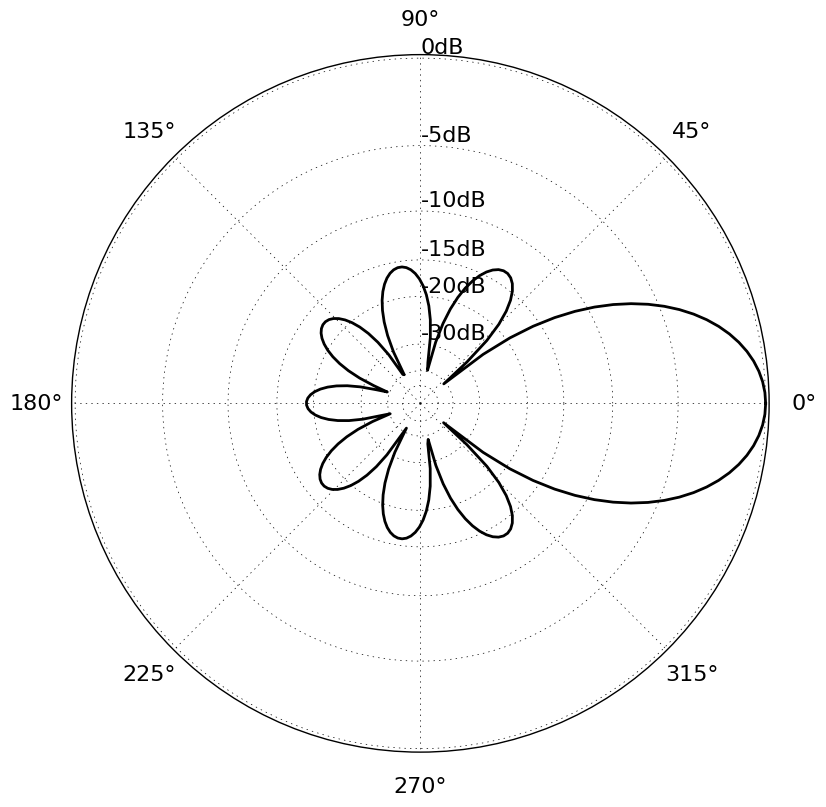

In [324]:
fig,ax = plot_dB_ARRL(phiplot,Esq)

In [325]:
#this will write the z-coordinates along the X AXIS in Eznec, and the elements will be oriented as verticals
element_length = 24.*foot
element_height_above_ground = 12.*foot
zp_e1 = element_height_above_ground-element_length/2.0
zp_e2 = element_height_above_ground+element_length/2.0
wirediam_mm = 25.0

with open('EZ_wires_optimum_directivity.txt','w') as f:
    f.write('m mm\r\n')
    for (xp,yp)in elcoords:
        tempwire = [xp,yp,zp_e1,xp,yp,zp_e2,wirediam_mm]
        f.write(', '.join(map(str,tempwire))+'\r\n')

In [326]:
Ioptnorm = Iopt/np.max(np.max(np.abs(Iopt)))

for i,current in enumerate(Ioptnorm): 
    print 'I{0}: {1:.5f}A'.format(i+1, np.abs(current)), 'phase: {0:.4f} '.format(np.angle(current)*180.0/np.pi)

I1: 0.81344A phase: 12.4479 
I2: 0.87663A phase: 167.3563 
I3: 0.72198A phase: -14.1250 
I4: 0.46558A phase: 158.8773 
I5: 0.29177A phase: -72.8708 
I6: 0.23326A phase: -68.8688 
I7: 0.50285A phase: 152.1682 
I8: 0.71519A phase: -16.4061 
I9: 0.86719A phase: 173.0571 
I10: 1.00000A phase: -87.7375 
I11: 0.99605A phase: 87.7179 
I12: 0.10594A phase: 2.1406 


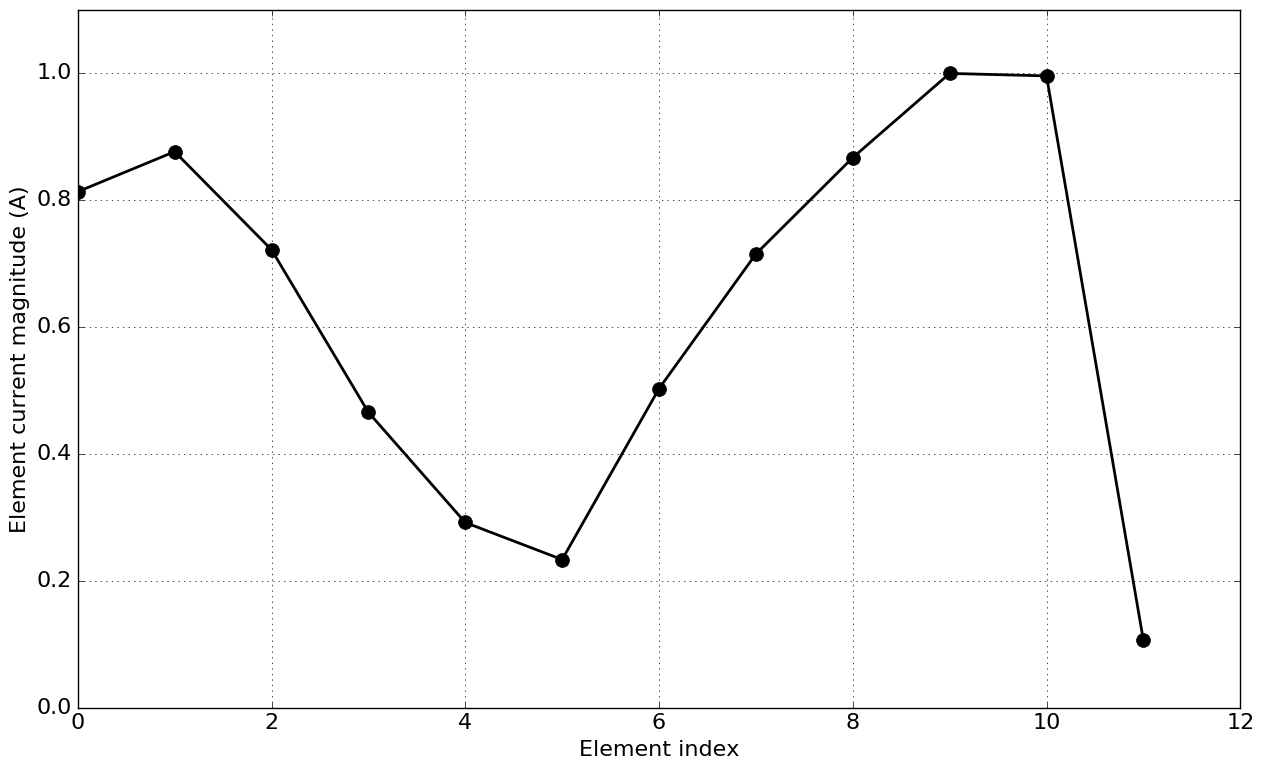

In [327]:
plt.plot(xrange(0,len(elcoords)),np.abs(Ioptnorm),marker='o')
plt.ylim([0,1.1])
plt.grid()
plt.xlabel('Element index')
plt.ylabel('Element current magnitude (A)')

In [328]:
ezmax = -9.66
ez_avg_gain = -23.33

D = ezmax-ez_avg_gain
print 'EZNEC directivity is {0:.2f}dB, python {1:.2f}dB'.format(D,10.0*np.log10(Dmax))

EZNEC directivity is 13.67dB, python 12.04dB


In [329]:
fuzzer_mag_mult = 0.01* np.abs(Iopt).mean()
fuzzy_I_list = []
for i in xrange(0,10):
    Ifuzzed = Iopt + fuzzer_mag_mult*np.random.rand(len(Iopt))*np.exp(np.pi*1j*np.random.rand(len(Iopt)))
    numerator = np.matmul(np.matmul(Ifuzzed.conj(),A),Ifuzzed)
    denominator = np.matmul(np.matmul(Ifuzzed.conj(),B),Ifuzzed)
    D = np.abs(numerator/denominator)
    pertsize = np.abs((Ifuzzed-Iopt)/Iopt).mean()
    fuzzy_I_list.append(Ifuzzed)
    print 'Directivity changed to {0:.2f}dB from {1:.2f}dB for perturbation of about {2:.2f}%'.format(10*np.log10(D),10*np.log10(Dmax),pertsize*100)

Directivity changed to 11.75dB from 12.04dB for perturbation of about 1.02%
Directivity changed to 11.78dB from 12.04dB for perturbation of about 0.83%
Directivity changed to 11.82dB from 12.04dB for perturbation of about 0.96%
Directivity changed to 11.82dB from 12.04dB for perturbation of about 0.82%
Directivity changed to 11.82dB from 12.04dB for perturbation of about 0.56%
Directivity changed to 11.82dB from 12.04dB for perturbation of about 0.64%
Directivity changed to 11.77dB from 12.04dB for perturbation of about 0.85%
Directivity changed to 11.82dB from 12.04dB for perturbation of about 0.78%
Directivity changed to 11.80dB from 12.04dB for perturbation of about 0.81%
Directivity changed to 11.76dB from 12.04dB for perturbation of about 1.02%


In [330]:
sum = 0
thplot = np.pi/2
phiplot = np.linspace(0,2*np.pi,200)
# all the thetas with phi=0, will use symmetry to see the other side of the pattern
patterns = []
for Ifuzzed in fuzzy_I_list:
    for Ii_cplx,(xi,yi) in zip(Ifuzzed,elcoords):
        sum = sum+Ii_cplx*np.exp(1j*(k*xi*np.sin(thplot)*np.cos(phiplot)+k*yi*np.sin(thplot)*np.sin(phiplot)))
    E = f_dipole(phiplot,thplot)*sum
    Esq = np.real(E*E.conj())
    patterns.append(Esq)

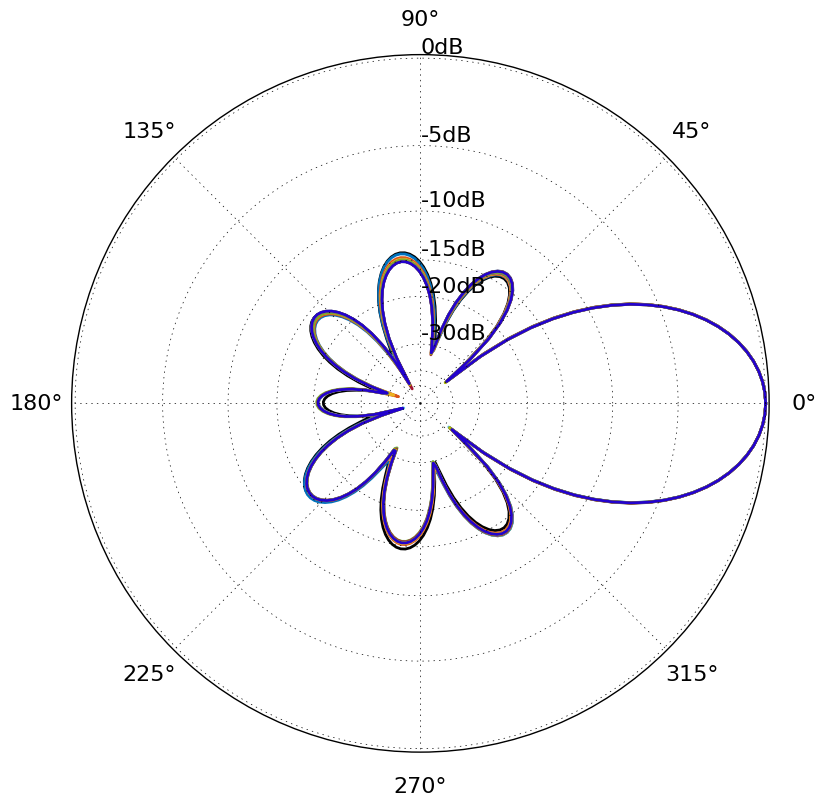

In [331]:
fig,ax = plot_dB_ARRL(phiplot,Esq)
for Esqf in patterns:
    addplot_dB_ARRL(thdata=phiplot,rdata=Esqf,axesobj=ax)


# CRITICALLY IMPORTANT NOTE: B ONLY NEEDS TO BE CALCULATED ONCE FOR EACH PHYSICAL ARRANGEMENT OF ELEMENTS! 

### Recalculate [e] for each desired heading. Could be implemented very, very fast.

In [332]:
np.linspace(0,360.0,24,endpoint=False)

array([   0.,   15.,   30.,   45.,   60.,   75.,   90.,  105.,  120.,
        135.,  150.,  165.,  180.,  195.,  210.,  225.,  240.,  255.,
        270.,  285.,  300.,  315.,  330.,  345.])

In [366]:

thplot = np.pi/2
phiplot = np.linspace(0,2*np.pi,200)
# all the thetas with phi=0, will use symmetry to see the other side of the pattern
patterns = []

multiplephi0 = (180+np.arange(0,80,10))*np.pi/180.0
th0r = 90.0*np.pi/180.0
multipleIopt = []
for ph0rn in multiplephi0:
    etemp = np.zeros(len(elcoords),dtype=np.complex_)
    th0r = theta0*np.pi/180.0

    for n,(x,y) in enumerate(elcoords):
        etemp[n] = np.exp(1j*(k*x*np.sin(th0r)*np.cos(ph0rn)+k*y*np.sin(th0r)*np.sin(ph0rn)))
    multipleIopt.append(np.matmul(Binv,etemp))


for Ioptn in multipleIopt:
    sum = 0
    for Ii_cplx,(xi,yi) in zip(Ioptn,elcoords):
        sum = sum+Ii_cplx*np.exp(1j*(k*xi*np.sin(thplot)*np.cos(phiplot)+k*yi*np.sin(thplot)*np.sin(phiplot)))
    E = f_dipole(phiplot,thplot)*sum
    Esq = np.real(E*E.conj())
    patterns.append(Esq)

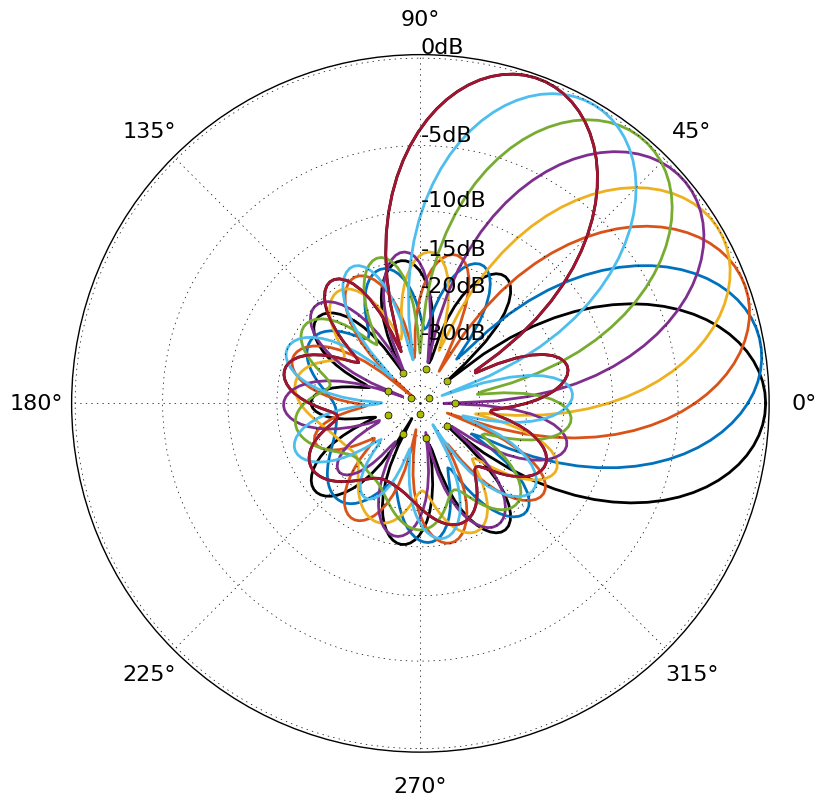

In [367]:
fig,ax = plot_dB_ARRL(phiplot,Esq)
for Esqf in patterns:
    addplot_dB_ARRL(thdata=phiplot,rdata=Esqf,axesobj=ax)
ax2 = ax.figure.add_axes(ax.get_position(), projection='polar', 
                             label='twin', frameon=False,
                             theta_direction=ax.get_theta_direction(),
                             theta_offset=ax.get_theta_offset())
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)

elplotR = []
elplotTh = []
for (x,y) in elcoords:
    elplotTh.append(np.arctan2(y,x))
    elplotR.append(np.power(np.power(x,2)+np.power(y,2),0.5))
ax2.set_rlim([0,np.max(elplotR)*10.0])
ax2.plot(elplotTh,elplotR,marker='o',markersize=5,color=plot_colors[8],linestyle='None')


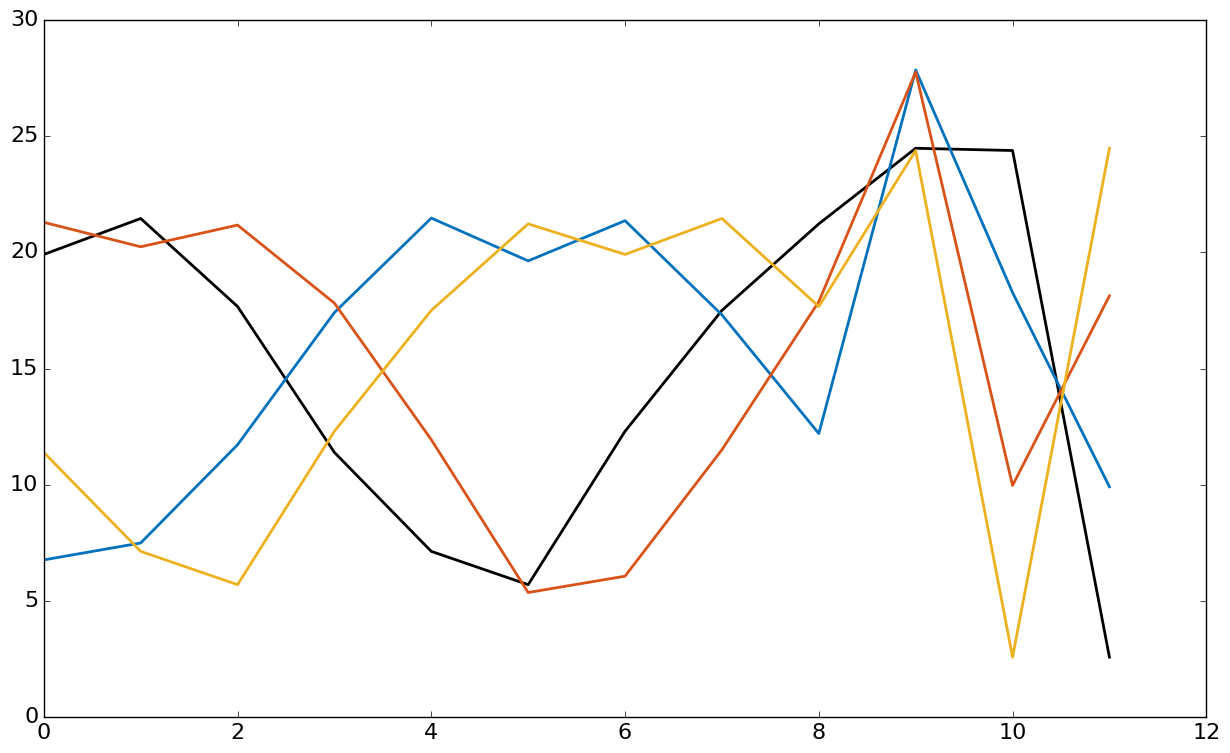

In [365]:
plt.plot(np.abs(multipleIopt).T)